# Load Ratings Data

In [52]:
import numpy as np
import pandas as pd
import os
import sys
import pickle
import time
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from importlib import reload
%matplotlib inline
from IPython.core.display import display, HTML, clear_output
display(HTML("<style>.container { width:80% !important; }</style>")) 

In [53]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 999

In [54]:
cwd = os.getcwd()
ratings = pd.read_csv(os.path.join(cwd, "..", "data", "ratings.csv"))
ratings.drop('timestamp', axis=1, inplace=True)
movies = pd.read_csv(os.path.join(cwd, "..", "data", "movies.csv"))

In [55]:
ratings = pd.merge(left=movies, right=ratings, on='movieId', how="right")

In [56]:
ratings.head()

movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
2        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
3        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
4        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   

   userId  rating  
0       3     4.0  
1       6     5.0  
2       8     4.0  
3      10     4.0  
4      11     4.5

# Explore Popular and Niche Movies

In [59]:
popularity = pd.DataFrame(ratings[['userId', 'title', 'movieId']].groupby(['title', 'movieId']).agg(['count']))
popularity.reset_index(inplace=True)
popularity.columns = ['title', 'movieId', 'ratings_count']
popularity.sort_values('ratings_count', ascending=False, inplace=True)

In [60]:
popularity.head()

title  movieId  ratings_count
18839               Pulp Fiction (1994)      296          67310
8726                Forrest Gump (1994)      356          66172
20794  Shawshank Redemption, The (1994)      318          63366
21009  Silence of the Lambs, The (1991)      593          63299
12657              Jurassic Park (1993)      480          59715

In [61]:
popularity.tail()

title  movieId  ratings_count
3008          Bleak Night (2010)   118236              1
8716            Forgotten (2012)   131070              1
16590  Never Make It Home (2011)   113816              1
8712           Forgive Me (2006)   129518              1
26743                貞子3D (2012)   130640              1

In [62]:
popularity.query('title == "Primer (2004)"')

title  movieId  ratings_count
18637  Primer (2004)     8914           2643

In [63]:
popularity.query('title == "Inception (2010)"')

title  movieId  ratings_count
11834  Inception (2010)    79132          14023

In [64]:
popularity.query('title == "Lord of the Rings: The Fellowship of the Ring, The (2001)"')

title  movieId  \
14264  Lord of the Rings: The Fellowship of the Ring, The (2001)     4993   

       ratings_count  
14264          37553

In [67]:
popularity.query('title == "Grease (1978)"')

title  movieId  ratings_count
9887  Grease (1978)     1380          15630

In [68]:
popularity.query('title == "Zodiac (2007)"')

title  movieId  ratings_count
26682  Zodiac (2007)    51540           3907

In [69]:
popularity.query('title == "Shattered Glass (2003)"')

title  movieId  ratings_count
20791  Shattered Glass (2003)     6932           1170

In [65]:
sample_movies = popularity[popularity['title'].isin(["Primer (2004)", "Inception (2010)", "Lord of the Rings: The Fellowship of the Ring, The (2001)"])]
sample_movies

title  movieId  \
14264  Lord of the Rings: The Fellowship of the Ring, The (2001)     4993   
11834                                           Inception (2010)    79132   
18637                                              Primer (2004)     8914   

       ratings_count  
14264          37553  
11834          14023  
18637           2643

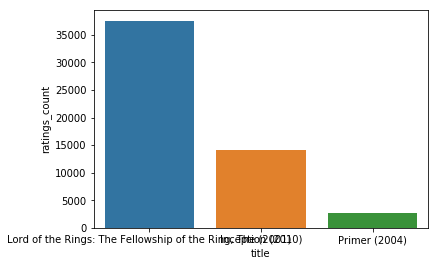

In [66]:
sns.barplot(x=sample_movies.title, 
            y=sample_movies.ratings_count)